In [3]:
import torch, torchvision, numpy as np
from torch import nn
from torch.utils.data import Dataset, DataLoader
from torchvision.transforms import Compose, RandomRotation, RandomHorizontalFlip, \
RandomApply, ColorJitter, Grayscale, ToTensor, Lambda

import matplotlib.pyplot as plt

In [4]:
from datasets import id2class, CIFAR10Dataset
%matplotlib inline

. 

### Verifying Images from Data Loader

.

### train

In [5]:
root_dir = '/scratch/vr1059/cifar10/data/'

train_transform = Compose([
    RandomRotation(25),
    RandomHorizontalFlip(),
    RandomApply([
        ColorJitter(brightness = 0.5, contrast = 0.5, saturation = 0.4, hue = (-0.5, 0.5)),
        Grayscale(3),
    ]),
    ToTensor(),
])
train_ds = CIFAR10Dataset(root_dir, 'train', '1k', transform=train_transform)

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=5, shuffle=True)

tensor([84, 25, 46, 31, 88])
tensor([8, 2, 2, 7, 3])
ship/
bird/
bird/
horse/
cat/


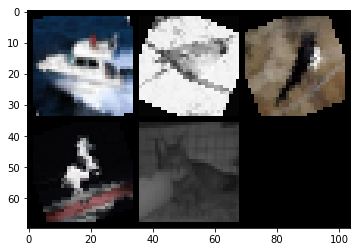

In [7]:
img, target, img_id = next(iter(train_loader))
print(img_id)
print(target)
[print(id2class(x)) for x in target]

plt.imshow(torchvision.utils.make_grid(img, nrow=3).numpy().transpose(1, 2, 0))

.

### val

In [13]:
root_dir = '/scratch/vr1059/cifar10/data/'

val_transform = Compose([
    ToTensor(),
])
val_ds = CIFAR10Dataset(root_dir, 'val', '1k', transform=val_transform)

val_loader = torch.utils.data.DataLoader(val_ds, batch_size=5, shuffle=True)

tensor([4926, 4906, 4913, 4988, 4966])
tensor([1, 3, 8, 2, 5])
automobile/
cat/
ship/
bird/
dog/


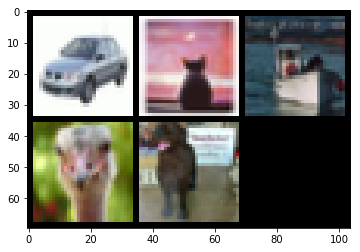

In [16]:
img, target, img_id = next(iter(val_loader))
print(img_id)
print(target)
[print(id2class(x)) for x in target]

plt.imshow(torchvision.utils.make_grid(img, nrow=3).numpy().transpose(1, 2, 0))